### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [79]:
data = pd.read_csv('data/coupons.csv')

In [80]:
#remove ; at the end of the code to see the output
data.head();

2. Investigate the dataset for missing or problematic data.

In [81]:
#missing percentage of each column, remove ; at the end of the code to display output

(data.isnull().mean() * 100).round(2);

**Results from investigating the dataset (Problem 2)**
* car column has very high percentage (over 99%) of missing data.  Candidate for dropping
* Bar, CofffeeHouse, CarryWay, RestaurantLessThan20, Restaurant20To50 have values like never, less1, 1\~3, 4~8, gt8.  Candidate for 'normalization'
* Bar, CofffeeHouse, CarryWay, RestaurantLessThan20, Restaurant20To50 have missing data.  Candidates for data input based on existing value (mean, mode, etc.)
* Age has values that are mostly numeric, but has values like 50plus, below21.  Candidate to replacement with numeric value for ease of analysis
* Income is in range with dollar and dash signs, and also values like 'Less than 12500' and '100000 or More'.  Candidate for stripping dollar and dash signs, and determine alternatives for Less than 12500 and 100000 or More
* Temperature and Time are alpha-numeric

**3**. Decide what to do about your missing data -- drop, replace, other...

**Decisions made to clean the dataset (Problem 3)**
* Car Column: Drop since the missing percentage is very high (over 99%)
* Bar, CofffeeHouse, CarryWay, RestaurantLessThan20, Restaurant20To50 Columns
    - Replace 1\~3, 4~8 with 2 and 6 respectively (mid points)
    - Replace never and less1 with 0
    - Replace gr8 with 8
    - populate NaNs with the median
    - change the datatype to numeric
* Age - replace 50plus with 51 and below21 with 20; change the datatype to numeric
* Income - parse the data in Income_low and Income_high without the dollar and dash signs and store them into two new columns

In [82]:
#since the percentag of missing value in columne 'car' is so high (99%+), let's remove it, and create a new dataframe
#We could have updated the existing 'data' frame, but we would keep data in its original form just in case we need it
data_clean1 = data.drop(columns=['car'])

In [83]:
#Clean Bar
#Run 1: replace 'never' -> 0; 'less1' -> 0; '1~3' -> 2 taking the mid point; '4~8' -> 6 taking the mid point; 'gr8' -> 8
data_clean2 = data_clean1.copy()
mapping = {'never': '0','less1': '0', '1~3': '2','4~8': '6','gt8': '8'}
data_clean2['Bar'] = data_clean2['Bar'].replace(mapping)

#Run 2: change the data type to numeric
data_clean2['Bar'] = pd.to_numeric(data_clean2['Bar'])

#Run 3: assign the meadian_value to the missing values.
median_value = data_clean2['Bar'].median()
data_clean2['Bar'] = data_clean2['Bar'].fillna(median_value)

In [84]:
#Clean COffeeHouse
#Run 1: replace 'never' -> 0; 'less1' -> 0; '1~3' -> 2 taking the mid point; '4~8' -> 6 taking the mid point; 'gr8' -> 8
data_clean3 = data_clean2.copy()
mapping = {'never': '0','less1': '0', '1~3': '2','4~8': '6','gt8': '8'}
data_clean3['CoffeeHouse'] = data_clean3['CoffeeHouse'].replace(mapping)

#Run 2: change the data type to numeric
data_clean3['CoffeeHouse'] = pd.to_numeric(data_clean3['CoffeeHouse'])

#Run 3: assign the meadian_value to the missing values.
median_value3 = data_clean3['CoffeeHouse'].median()
data_clean3['CoffeeHouse'] = data_clean3['CoffeeHouse'].fillna(median_value3)

In [85]:
#Clean CarryAway
#Run 1: replace 'never' -> 0; 'less1' -> 0; '1~3' -> 2 taking the mid point; '4~8' -> 6 taking the mid point; 'gr8' -> 8
data_clean4 = data_clean3.copy()
mapping = {'never': '0','less1': '0', '1~3': '2','4~8': '6','gt8': '8'}
data_clean4['CarryAway'] = data_clean4['CarryAway'].replace(mapping)

#Run 2: change the data type to numeric
data_clean4['CarryAway'] = pd.to_numeric(data_clean4['CarryAway'])

#Run 3: assign the meadian_value to the missing values.
median_value4 = data_clean4['CarryAway'].median()
data_clean4['CarryAway'] = data_clean4['CarryAway'].fillna(median_value4)

In [86]:
#Clean RestaurantLessThan20
#Run 1: replace 'never' -> 0; 'less1' -> 0; '1~3' -> 2 taking the mid point; '4~8' -> 6 taking the mid point; 'gr8' -> 8
data_clean5 = data_clean4.copy()
mapping = {'never': '0','less1': '0', '1~3': '2','4~8': '6','gt8': '8'}
data_clean5['RestaurantLessThan20'] = data_clean5['RestaurantLessThan20'].replace(mapping)

#Run 2: change the data type to numeric
data_clean5['RestaurantLessThan20'] = pd.to_numeric(data_clean5['RestaurantLessThan20'])

#Run 3: assign the meadian_value to the missing values.
median_value5 = data_clean5['RestaurantLessThan20'].median()
data_clean5['RestaurantLessThan20'] = data_clean5['RestaurantLessThan20'].fillna(median_value5)

In [87]:
#Clean Restaurant20To50
#Run 1: replace 'never' -> 0; 'less1' -> 0; '1~3' -> 2 taking the mid point; '4~8' -> 6 taking the mid point; 'gr8' -> 8
data_clean6 = data_clean5.copy()
mapping = {'never': '0','less1': '0', '1~3': '2','4~8': '6','gt8': '8'}
data_clean6['Restaurant20To50'] = data_clean6['Restaurant20To50'].replace(mapping)
data_clean6['Restaurant20To50'].value_counts(dropna=False)

#Run 2: change the data type to numeric
data_clean6['Restaurant20To50'] = pd.to_numeric(data_clean6['Restaurant20To50'])

#Run 3: assign the meadian_value to the missing values.
median_value6 = data_clean6['Restaurant20To50'].median()
data_clean6['Restaurant20To50'] = data_clean6['Restaurant20To50'].fillna(median_value6)


In [88]:
#Clean Age
#Run 1: replace 50plus change to 51; below21 change to 20; change the datatype to numeric
data_clean7 = data_clean6.copy()
mapping = {'50plus':'51', 'below21':'20'}
data_clean7['age'] = data_clean7['age'].replace(mapping)

#Run 2: change the data type to numeric
data_clean7['age'] = pd.to_numeric(data_clean7['age'])

In [89]:
#Clean Income
#Run 1: split income column into two numeric columns income_low and income_high. this will help us to compare based on income
#remove the $ signs, poplate income_low with numbers left of the dash, and populate income_high with the ones on the right

data_clean8 = data_clean7.copy()

data_clean8[['income_low', 'income_high']] = (
    data_clean8['income']
    .str.replace('$', '', regex=False)
    .str.split('-', expand=True)
)

#Run 2: Strip any leading/trailing whitespace from the new columns
data_clean8['income_low'] = data_clean8['income_low'].str.strip()
data_clean8['income_high'] = data_clean8['income_high'].str.strip()

# Run 3: Convert to numeric/float
data_clean8['income_low'] = pd.to_numeric(data_clean8['income_low'], errors='coerce')
data_clean8['income_high'] = pd.to_numeric(data_clean8['income_high'], errors='coerce')

#after splitting the income to income_low and income_high columns it was noted that some values are marked as '$100000 or More' and 'Less than $12500'
#lets put the income_low and income_high as 100000, 100001; and 12499-12500

#data_clean8.loc[data_clean8['income'] == '100000 or More', ['income_low', 'income_high']] = [100000, 100001]


# Run 4: Use np.where() for each column
data_clean8['income_low'] = np.where(data_clean8['income'] == '$100000 or More', 100000, data_clean8['income_low'])
data_clean8['income_high'] = np.where(data_clean8['income'] == '$100000 or More', 100001, data_clean8['income_high'])

data_clean8['income_low'] = np.where(data_clean8['income'] == 'Less than $12500', 1, data_clean8['income_low'])
data_clean8['income_high'] = np.where(data_clean8['income'] == 'Less than $12500', 12499, data_clean8['income_high'])

In [90]:
#Clean dataset to work with - Cleaning Completed
data_final = data_clean8.copy()

4. What proportion of the total observations chose to accept the coupon?



In [91]:
#Porpotion of observation that chose to accept the coupon, should be the count divided by the sum of values in Column Y

acceptance_proportion = (data_final['Y'].sum()/data_final['Y'].count()).round(2)
print('Prob-4A: ', acceptance_proportion, ' of the total observations chose to accept the coupon')

Prob-4A:  0.57  of the total observations chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

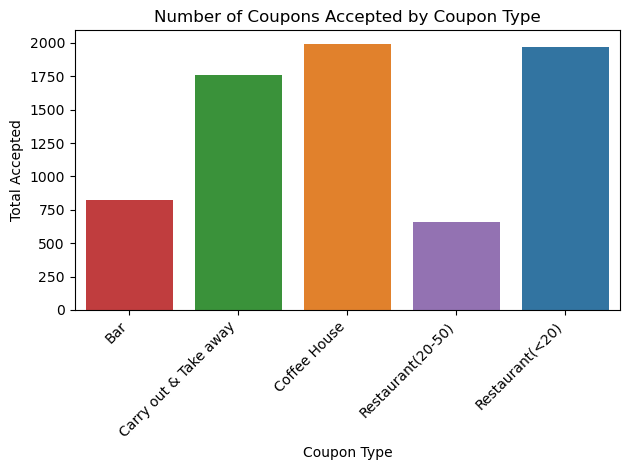

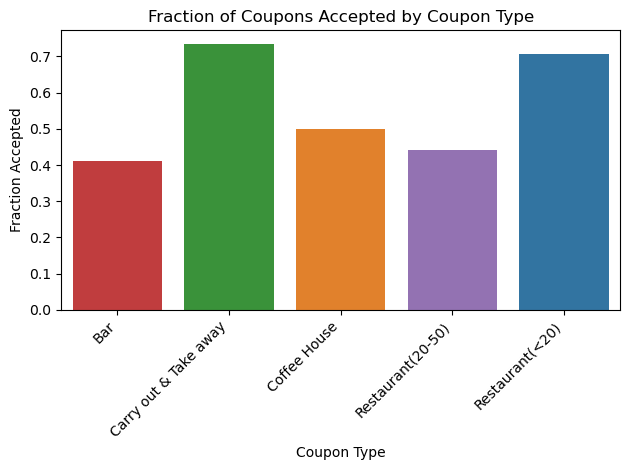

In [92]:
sorted_category = sorted(data_final['coupon'].unique())

#bar plot based on total accepted
sns.barplot(x='coupon', y='Y', data=data_final, estimator=sum, hue='coupon', order=sorted_category, errorbar=None)
plt.title('Number of Coupons Accepted by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Total Accepted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#bar plot based on fraction accepted
sns.barplot(x='coupon', y='Y', data=data_final, hue='coupon', order=sorted_category, errorbar=None)
plt.title('Fraction of Coupons Accepted by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Fraction Accepted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

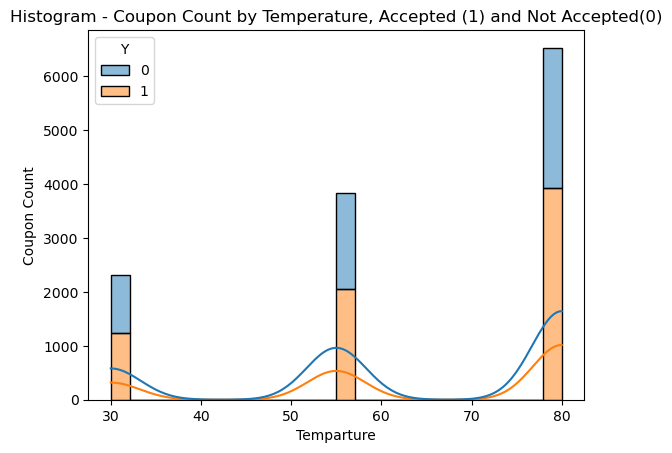

In [93]:
#data_final['temperature'].value_counts()
sns.histplot(data=data_final, x='temperature', hue='Y', multiple='stack', kde = True)
plt.title('Histogram - Coupon Count by Temperature, Accepted (1) and Not Accepted(0)')
plt.xlabel('Temparture')
plt.ylabel('Coupon Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [94]:
#new dataframe is data_final_bar
data_final_bar = data_final[data_final['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [95]:
#acceptance rate is asked in multiple places, it would be appopriate to define a function that can be reused

def calculate_acceptance_rate(data_frame, row_select):
    """
    Purpose: detemines the acceptance rate based on a given selection criteria.
    Arguments: data_frame (pd.DataFrame); row_select (pd.Series) limiting the rows
    Returns: float: The acceptance rate (sum of 'Y' / count of 'Y'). (Y is 1 for acceptance, and 0 for non-acceptance
    """
    selected_rows = data_frame[row_select]
    ysum = selected_rows['Y'].sum()            #sum should give the total acceptance
    ycount = selected_rows['Y'].count()        #count should give the total number of records (acceptance + non-accpetance)
    
    return ysum/ycount if ycount > 0 else 0    #else condition for preventing division by zero


In [96]:
#proportion of bar coupon accepted
bar_acceptance_rate = calculate_acceptance_rate(data_final_bar, data_final_bar['coupon'] == 'Bar')
print ('BAR-2. Acceptance Rate of Bar Coupons: ', bar_acceptance_rate.round(2))

BAR-2. Acceptance Rate of Bar Coupons:  0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [97]:
#Acceptance Rate for those who 
bar_acceptance_rate_leq_3 = calculate_acceptance_rate(data_final_bar, (data_final_bar['Bar'] <= 3))

bar_acceptance_rate_gt_3 = calculate_acceptance_rate( data_final_bar, (data_final_bar['Bar'] > 3))

print('BAR-3A. Acceptance Rate of drivers who went to bar 3 or fewer times: ',  bar_acceptance_rate_leq_3.round(2))
print('BAR-3B. Acceptance Rate of drive who went to bar more than 3 timess: ', bar_acceptance_rate_gt_3.round(2))
print('BAR-3C. Comparison of drivers who went to bar 3 or fewer times and who went to bar more than 3 times is 1:', 
      (bar_acceptance_rate_gt_3/bar_acceptance_rate_leq_3).round(2))


BAR-3A. Acceptance Rate of drivers who went to bar 3 or fewer times:  0.37
BAR-3B. Acceptance Rate of drive who went to bar more than 3 timess:  0.77
BAR-3C. Comparison of drivers who went to bar 3 or fewer times and who went to bar more than 3 times is 1: 2.07


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [98]:
#determine the sum/acceptance of drivers go to bar more than 1 time and are over 25
#determin the count (acceptance & non-acceptance) of drivers who go to bar more than 1 time and over 25
bar_gt1_gt25_sum = data_final_bar[(data_final_bar['Bar'] > 1) & (data_final_bar['age']>25) ]['Y'].sum()
bar_gt1_gt25_count = data_final_bar[(data_final_bar['Bar'] > 1) & (data_final_bar['age']>25) ]['Y'].count()
bar_acceptance_rate_gt1_gt25 = bar_gt1_gt25_sum/bar_gt1_gt25_count

#the following count of all drive (not filter criteria
bar_everyone_sum = data_final_bar['Y'].sum()
bar_everyone_count = data_final_bar['Y'].count()

#number of 'others' is difference between all drivers (minus) meeting the selection criteria
bar_others_sum = bar_everyone_sum - bar_gt1_gt25_sum
bar_others_count = bar_everyone_count - bar_gt1_gt25_count
bar_acceptance_rate_others = bar_others_sum/bar_others_count

print('BAR-4A. Acceptance Rate of drivers who go to bar more than once a month and are over 25:  ', bar_acceptance_rate_gt1_gt25.round(2))
print('BAR-4B. Acceptance Rate of all other drivers: ', bar_acceptance_rate_others.round(2))
print('BAR-4C. Comparison of drivers who go to bar more than once a month and over 25 with all others: ', 
      (bar_acceptance_rate_gt1_gt25/bar_acceptance_rate_others).round(2))

BAR-4A. Acceptance Rate of drivers who go to bar more than once a month and are over 25:   0.7
BAR-4B. Acceptance Rate of all other drivers:  0.34
BAR-4C. Comparison of drivers who go to bar more than once a month and over 25 with all others:  2.08


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [99]:
#data_final_bar['passanger'].value_counts()

bar_gt1_nokid_sum = data_final_bar[(data_final_bar['Bar'] > 1) &
    (~data_final_bar['passanger'].isin(['Kid(s)', 'Alone'])) & 
     (~data_final_bar['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].sum()

bar_gt1_nokid_count = data_final_bar[(data_final_bar['Bar'] > 1) &
    (~data_final_bar['passanger'].isin(['Kid(s)', 'Alone'])) & 
     (~data_final_bar['occupation'].isin(['Farming Fishing & Forestry']))]['Y'].count()

bar_acceptance_rate_gt1_nokid = bar_gt1_nokid_sum/bar_gt1_nokid_count

#the following count of all drive (not filter criteria
bar_everyone_sum = data_final_bar['Y'].sum()
bar_everyone_count = data_final_bar['Y'].count()


#number of 'others' is difference between all drivers (minus) meeting the selection criteria
bar_others_sum = bar_everyone_sum - bar_gt1_nokid_sum
bar_others_count = bar_everyone_count - bar_gt1_nokid_count
bar_acceptance_rate_others = bar_others_sum/bar_others_count

print('BAR-5A. Acceptance Rate of drivers who go to bar more than 1, and had passengers that were not kid and occupation other than FForF: ', 
      bar_acceptance_rate_gt1_nokid.round(2))
print('BAR-5B. Acceptance Rate of all other drivers: ', bar_acceptance_rate_others.round(2))

BAR-5A. Acceptance Rate of drivers who go to bar more than 1, and had passengers that were not kid and occupation other than FForF:  0.72
BAR-5B. Acceptance Rate of all other drivers:  0.38


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



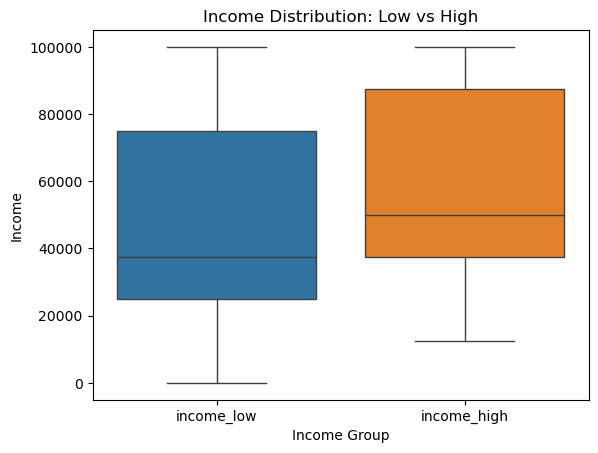

In [100]:
#Since there is use case based on Income, box plots may show any major outliers

sns.boxplot(data=data_final_bar[['income_low', 'income_high']])
#sns.swarmplot(data=data_final_bar[['income_low', 'income_high']], color='0.25', size=3)
#sns.stripplot(data=data_final_bar[['income_low', 'income_high']], color='black', alpha=0.4, size=2)
plt.title("Income Distribution: Low vs High")
plt.ylabel("Income")
plt.xlabel("Income Group")
plt.show()

In [101]:
#6.A calculation of acceptence rate of bar coupons for those who 
#go to bars more than once a month, had passengers that were not a kid, and were not widowed

bar_acceptance_rate_gt1_nokid_nowdw = calculate_acceptance_rate (data_final_bar, ((data_final_bar['Bar'] > 1) &
    (~data_final_bar['passanger'].isin(['Kid(s)', 'Alone'])) & 
     (~data_final_bar['maritalStatus'].isin(['Widowed']))))

print('BAR-6A. Acceptance Rate for drivers who go more than once to bar, passengers that were not kids, and not widowed: ',
       bar_acceptance_rate_gt1_nokid_nowdw.round(4))
                                                                 

#6.B calculation of acceptance rare of bar coupons for those who --> go to bars more than once a month and are under the age of 30 

bar_acceptance_rate_gt1_lt30 = calculate_acceptance_rate(data_final_bar, ((data_final_bar['Bar'] > 1) & (data_final_bar['age']< 30)))

print('BAR-6B. Acceptance Rate for drivers who go more than once to bar, and under the age of 30: ', 
      bar_acceptance_rate_gt1_lt30.round(4))


#6.C calculation of acceptance rate of bar coupons for those who --> go to cheap restaurants more than 4 times a month and income is less than 50K

bar_acceptance_rate_crgt4_lt50k = calculate_acceptance_rate (data_final_bar, 
                                                              ((data_final_bar['RestaurantLessThan20'] > 4) & (data_final_bar['income_low'] < 50000)))

print('BAR-6C. Acceptance Rate for drivers who go to cheap restaurrants more than four times a month and earns less than 50K :', 
      bar_acceptance_rate_crgt4_lt50k.round(4))

#data_final_bar.to_csv('data/data_bar.csv', index = False)


BAR-6A. Acceptance Rate for drivers who go more than once to bar, passengers that were not kids, and not widowed:  0.7179
BAR-6B. Acceptance Rate for drivers who go more than once to bar, and under the age of 30:  0.7217
BAR-6C. Acceptance Rate for drivers who go to cheap restaurrants more than four times a month and earns less than 50K : 0.4535


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Following are the hypothesis based on analysis of the data (Problem 7)**
* The overall acceptance rate for all coupon types [Prob-4] is 0.57. Whereas, for Bar coupon it is 0.41 [BAR-2] which is less than the overall rate.  It might make sense to move away from Bar coupons and focus on other coupons with higher acceptance rate.
* Drivers who went to bars more than 3 times a month are more likely to accept bar coupons (0.77) than the driver who went less frequently (.37).  In other words drivers who went to bars more than 3 times are more than 2 times likely to accept.[BAR-3A, BAR-3B, BAR-3C].
* Younge drivers (age less than 25) and who visited bar more than once a month are much more likely to accept the bar coupon than the rest of the other drivers, 0.70 vs 0.34, which is sligtly more than two times. [BAR-4a, BAR-4B, BAR-4C]
* Drivers who went to bar atleast once a month, did not have kids as passenger, and occupation other than Farming Fishing & Forestry had the acceptance of 0.72, whereas all other drivers had an acceptance rate of 0.38.  There could be various reasons, e.g., it's not likely that someone would go to the bar with kids, maybe use of coupon and go to certain bars may be inconvinient for folks who work in Farming, Fishing & Forestry.  Further reasearch is needed. [BAR-5A, BAR05B]
* Acceptance Rate of drivers who go more than once to a bar, with passengers that were not kids, and not widowed had similar acceptance rate compared to the drivers who go more than once a month to the bar and under the age to 30 (0.7172 vs 0.7217).  One the other hand, the drivers who went to cheap restaurants more than four times a month and earn less than 50K was low (0.4535) that clear indicates income level plays a critical role.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Independent Investigation 
**Problem Statement: Explore and Analyze 'Carry out & Take away' coupon**

**Steps:**
* Create a new DataFrame that contains just the 'Carry out & Take away' coupons.
* Even though overall data quality check was made in the earlier statges for this assigment, take closer look at data for this specific set of use cases
* Determine the overall acceptance rate of 'Carry out & Take away' coupons.
* Visualize the total and acceptance of coupons by maritalStatus
* Pick the largest two maritalStatus groups based on the above visualization for further analysis
* Compare the acceptance rate for each of the two maritalStatus group gender
* Compare the acceptance rate for each of the two maritalStatus group gender

In [102]:
#Create a new DataFrame that contains just the 'Carry out & Take away' coupons.
data_final_cota = data_final[data_final['coupon'] == 'Carry out & Take away']

In [103]:
#data check
#check if any bad data in the direction_same and direction_opp, if one is '1', the other has to be '0'
(data_final_cota['direction_same'] == data_final_cota['direction_opp']).value_counts()

False    2393
Name: count, dtype: int64

In [104]:
# determine the overall acceptance rate for 'Carry out & Take away' coupons
cota_sum = data_final_cota['Y'].sum()
cota_count = data_final_cota['Y'].count()
cota_accp_rate = cota_sum/cota_count

print('Overall Acceptance Rate of Carry out & Take away coupons: ', cota_accp_rate.round(2))

Overall Acceptance Rate of Carry out & Take away coupons:  0.74


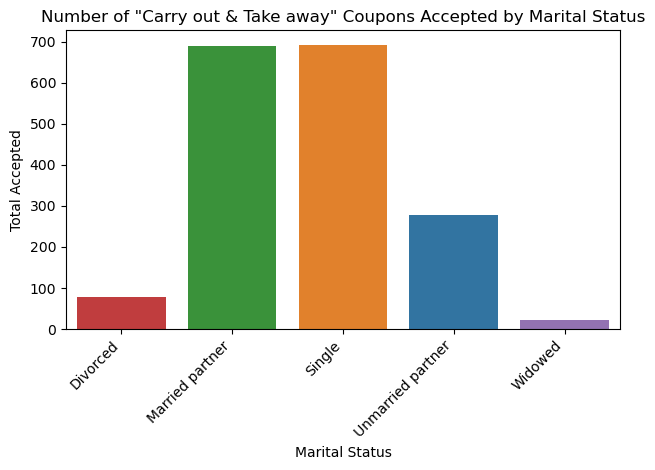

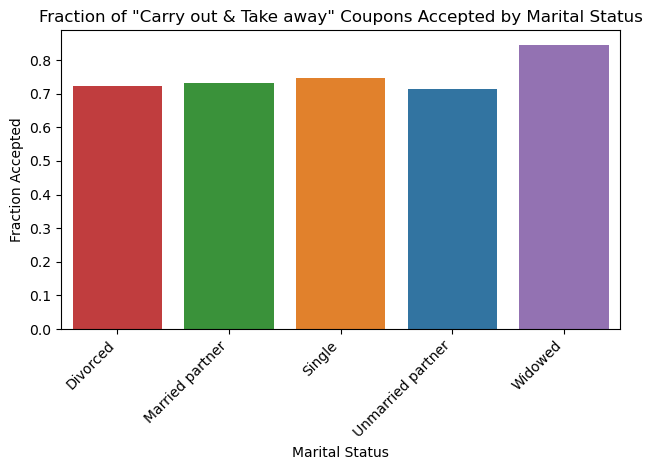

In [105]:
#Visualize the total and acceptance of coupons by maritalStatus

sorted_category = sorted(data_final['maritalStatus'].unique())

#bar plot based on total accepted
sns.barplot(x='maritalStatus', y='Y', data=data_final_cota, estimator=sum, hue='maritalStatus', order=sorted_category, errorbar=None)
plt.title('Number of "Carry out & Take away" Coupons Accepted by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Accepted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#bar plot based on fraction accepted
sns.barplot(x='maritalStatus', y='Y', data=data_final_cota, hue='maritalStatus', order=sorted_category, errorbar=None)
plt.title('Fraction of "Carry out & Take away" Coupons Accepted by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Fraction Accepted')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [106]:
#Pick the largest two maritalStatus groups based on the above visualization for further analysis
data_final_cota['maritalStatus'].value_counts();

In [107]:
#Compare the acceptance rate for each of the two maritalStatus groups by gender

#acceptance rate for married partners by gender
cota_accp_rate_married_female = calculate_acceptance_rate(data_final_cota, 
                                                          ((data_final_cota['maritalStatus'] == 'Married partner') & 
                                                          (data_final_cota['gender'] == 'Female')))

cota_accp_rate_married_male = calculate_acceptance_rate(data_final_cota, 
                                                          ((data_final_cota['maritalStatus'] == 'Married partner') & 
                                                          (data_final_cota['gender'] == 'Male')))

#acceptance rate for married partners by direction (direction_same = 1, 0)
cota_accp_rate_married_samedir = calculate_acceptance_rate (data_final_cota, 
                                                           ((data_final_cota['maritalStatus'] == 'Married partner') & 
                                                            (data_final_cota['direction_same'] == 1)))

cota_accp_rate_married_oppdir = calculate_acceptance_rate (data_final_cota,
                                                           ((data_final_cota['maritalStatus'] == 'Married partner') & 
                                                           (data_final_cota['direction_same'] == 0)))
                                                           

print('Acceptance Rate of coupen by Married Females: ', cota_accp_rate_married_female.round(2))
print('Acceptance Rate of coupon by Married Males: ', cota_accp_rate_married_male.round(2))
print('')
print('Acceptance Rate of coupon by Married individuals Dirving in Same Direction: ', cota_accp_rate_married_samedir.round(2))
print('Acceptance Rate of coupon by Married individuals Dirving in Opposite Direction: ', cota_accp_rate_married_oppdir.round(2))

Acceptance Rate of coupen by Married Females:  0.72
Acceptance Rate of coupon by Married Males:  0.75

Acceptance Rate of coupon by Married individuals Dirving in Same Direction:  0.73
Acceptance Rate of coupon by Married individuals Dirving in Opposite Direction:  0.73


### Independent Investigation 
**Findings:**
* As is evident from the histogram, the acceptance rate of **Carry Out & Take Away Coupons** are very similar across each Marital Status Group, with Widowed Group higher than the rest.
* The other groups (other than Widowed) have acceptance rate close to the overall acceptance rate of 74% 
* Widowed data size of 26 is the significantly smaller than the others, so significant conclusion on the acceptance rate may not be made.
* Among the married couples, coupons sent to male divers has higher acceptance rate than to the female drivers (75% vs 72%)
* Diriving Direction has no significant effect on the acceptance rate for Married Couples
  
**Recommendations:**  
* Since the criteria chosen for this analysis was limited and did not show significant variation in acceptance rates, it is recommended that other features are looked into.
* Some suggested criteria to consider., drivers with children (e.g., if the coupon is based on order size), time of day (e.g., more carry out may happen in the evening), drivers' income (low income may mean less purchase, high income may mean going to expensive restaurent).
